In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
"""
When calling fetch_housing_data() it creates a directory in the workspace
and downloads the housing.tgz file and extracts the housing.cvs file
the directory
"""
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
"""
This function returns a pandas dataframe object containing all the data
"""
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()
"""
- each row represents a single district
- with a total of 10 attributes
"""

'\n- each row represents a single district\n- with a total of 10 attributes\n'

In [7]:
housing.info()
"""
- this method is useful to get quick descriptions of the data
- example of info it gives: # of rows, attribute type, # of non-null values
- ocean_proximity is an object but because it's loaded from a csv file it's a
text attribute
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


"\n- this method is useful to get quick descriptions of the data\n- example of info it gives: # of rows, attribute type, # of non-null values\n- ocean_proximity is an object but because it's loaded from a csv file it's a\ntext attribute\n"

In [8]:
"""
here we are finding what categories exist and how many districts belong 
to each category
"""
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
"""
this will show a summary of all the numerical attributes
"""
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


"\nthe hist() method relies on matplotlib but before you can use it, you should\nspecify which backend matplotlib should be used.\nThe simplest way to do this is to use jupyter's magic %matplotlib inline command\nthis tells jupyter to setup matplotlib to use on it own backend\n"

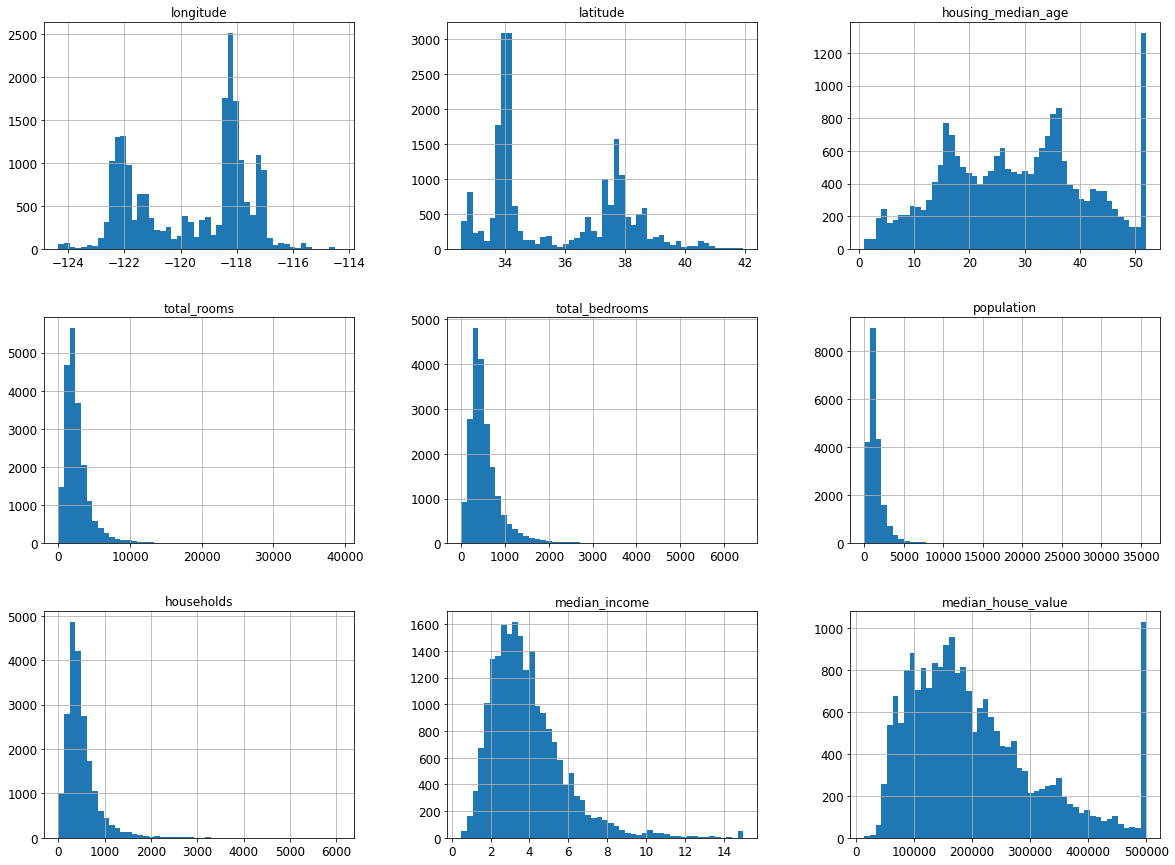

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
"""
the hist() method relies on matplotlib but before you can use it, you should
specify which backend matplotlib should be used.
The simplest way to do this is to use jupyter's magic %matplotlib inline command
this tells jupyter to setup matplotlib to use on it own backend
"""

In [11]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [13]:
len(test_set)

4128

In [14]:
from zlib import crc32

In [15]:
# computing a hash for each instances identifier
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

In [16]:
# Ensuring that the test set will remain consistent across multiple runs
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
# Adding an index column
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
# to create a stable identifier you can use something like longitude and latitude to make an identifier
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
# Breaking median income into 5 seprate stratas based on the bins to the graph
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

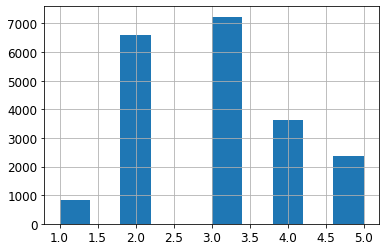

In [21]:
housing["income_cat"].hist()

In [22]:
# stratified sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
!jt -t monokai

In [24]:
import matplotlib.pyplot as plt  
plt.style.use('dark_background')

In [25]:
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [26]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [27]:
# removing the income_cat attribute so data is back to is orginal state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [28]:
# making a copy of our training set
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

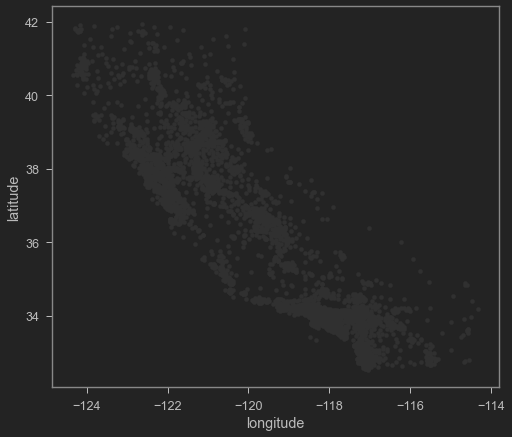

In [29]:
# with latitude and longitude we can make a graph ti visualize districts
# with this we can clearly see california but it's hard to see any patttern with it
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

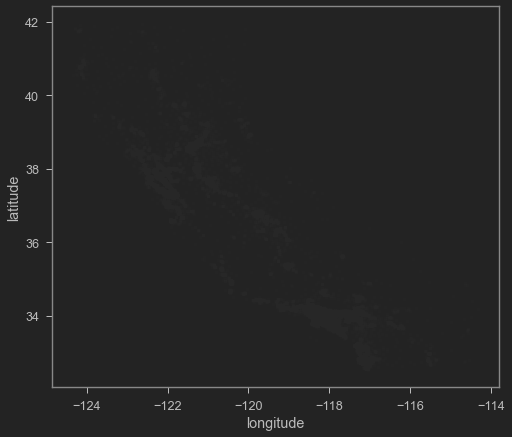

In [30]:
# to add a pattern to the graph above we need to add alpha to equal .1
# this highlights high-density areas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Saving figure housing_prices_scatterplot


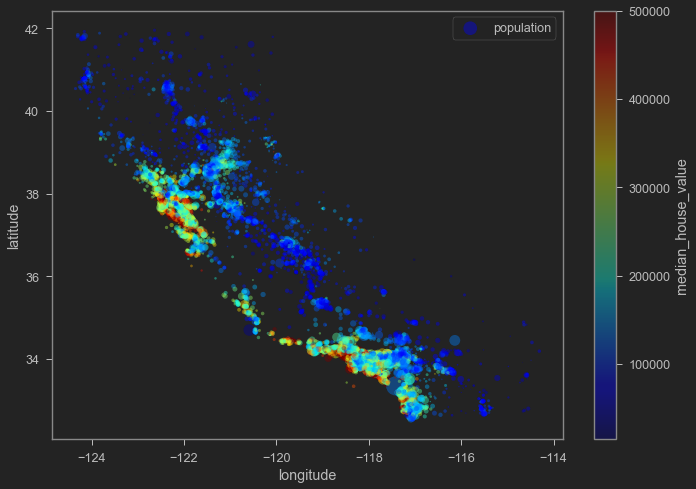

In [31]:
"""
we are now going to focus on our visualization of the map above
the radius of each circle represents the districts population (option s)
- big circle big population, small circle small population
the color represents the price (option c)
- blue poor, red rich
we use a predifined color map (cmap) called jet, which ranges from blue (low) to red (high)
"""
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [32]:
# since the dataset is not too large we can easily compute the 'stand correlation coefficient'
# - this is also known as Pearson's r, between every pair of attributes using the corr() method
corr_matrix = housing.corr()

# now we can see how each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

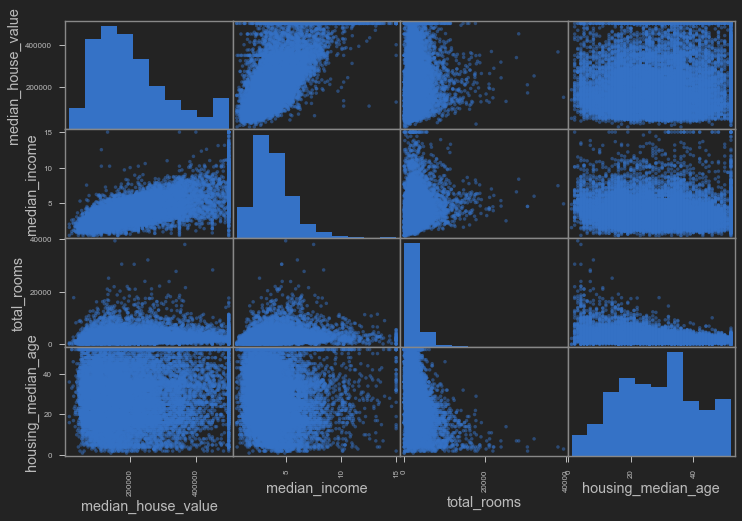

In [33]:
# we could in there compare every attribute to itself but with 11 current attributes what would be
# 11^2 = 121 which is a lot and unnessarcy
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

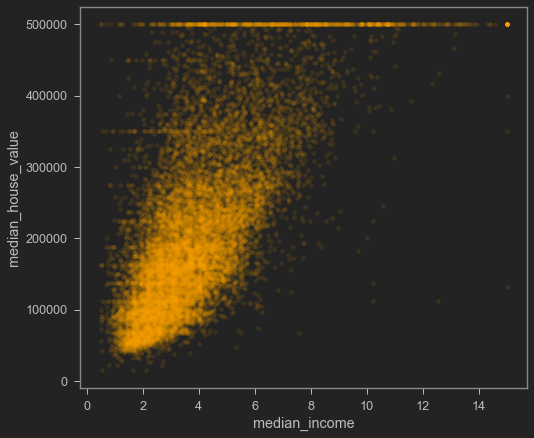

In [34]:
# the attribute that shows the strongest correlation is median income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.1, color='orange')

In [35]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [36]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# below we see bedrooms per room as a high correlation than total bedroom or total rooms
# note that just because it's negative doesn't mean lower correlation
# 0 or close to zero means little correlation

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [37]:
# reverting back to a clean training set, and seperating the prdictor and the labels
# doing this because we don't want to apply the same transformations to the predictor and target values
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [39]:
# below are options to handle missing features
housing.dropna(subset=["total_bedrooms"])   # option 1
housing.drop("total_bedrooms", axis=1)      # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
# when using option 3, we computing the median value and filling in the missing values with
# the median value in the training set

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# the median is computed on numerical attributes, we need a copy of the data without text from
# "ocean_proximity"
housing_num = housing.drop("ocean_proximity", axis=1)
# now that it's droped we can now fit the imputer instance to the training data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
# applying an imputer to all numerical attributes
# imputer computed the median for each attribute and stored the results in "statistics_" instance variable
imputer.statistics_
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [51]:
# now that the imputer is "trained" by replacing missing values with learned medians
X = imputer.transform(housing_num)
# this is a plain numpy array containing transformed features

In [52]:
# to put it in a pandas dataframe we do this
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [54]:
# looking at 10 instances of ocean_proximity
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)
# it's not arbitrary text, it's a limited amount of values each that represents a category

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [55]:
# here we will turn the texts into numbers because ML algorithms perfer to work with numbers
    # imported ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder
    # assigned a variable to ordinalEncoder method
ordinal_encoder = OrdinalEncoder()
    # we use the fit_transform in conjuction with ordinal_encoder to change the categories of the
    # housing_cat and then assigned that to housing_cat_encoded
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
    # this is selecting the first 10 of the list
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [56]:
# we get a list of categories using categories_ instance variable
# it's a list containing a 1D array of categories because there's one categorical attribute
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# it creates a sparse matrix instead of a numpy array, this is very useful when you have categorical
# attributes with 1000's of categories, using ton's of memory to store zero's would be wasteful,
# so instead it uses a sparse matrix which only stores the location of the 1
# but if you really need to convert it to a numpy array you can use the toarray() method

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [58]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [59]:
# can peak at the categories again by using the encoder's categories_
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]